<a href="https://colab.research.google.com/github/Tiamiyu1/HDSC-Premiere-Project-Team_PCA-/blob/main/Model%20Building/modeling_%2B_oversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I oversampled the dataset to make it a balanced dataset, after that, I followed the modelling notebook to test the balanced dataset, which improved the overall f1_score. RandomforestClassifier has the highest value.     Also, I tried removing some columns due to their correlation value with the target feature (CDR) but all model but one, tested with it gave lower f1_score compared to the baseline I got when I used all available features. The one with better F1 score had the male column removed and the algorithm used was randomforestclassifier

# Step 2 - Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Tiamiyu1/HDSC-Premiere-Project-Team_PCA-/main/Data/dementia_dataset.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
df.shape

(373, 15)

#### ENCODING CATEGORICAL DATA

#### Two categorical columns: M/F and Group.

In [4]:
from sklearn.preprocessing import OneHotEncoder

# Create instance of OneHotEncoder.
ohe = OneHotEncoder()

# Perform OneHotEncoding on the Group column.
df_ohe1 = pd.DataFrame(ohe.fit_transform(df[['Group']]).toarray(), columns=ohe.categories_)

# Merge OneHotEncoded column with df dataframe.
df2 = df.join(df_ohe1)

# View dataframe.
df2.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)"
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,0.0,0.0,1.0
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,0.0,0.0,1.0
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046,0.0,1.0,0.0
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010,0.0,1.0,0.0
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034,0.0,1.0,0.0


In [5]:
# Perform OneHotEncoding on the M/F column.
df_ohe2 = pd.DataFrame(ohe.fit_transform(df[['M/F']]).toarray(), columns=ohe.categories_)

# Merge OneHotEncoded column with dataframe.
df_final = df2.join(df_ohe2)

# View final dataframe.
df_final

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)"
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,0.0,0.0,1.0,0.0,1.0
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,0.0,0.0,1.0,0.0,1.0
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046,0.0,1.0,0.0,0.0,1.0
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010,0.0,1.0,0.0,0.0,1.0
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037,0.0,1.0,0.0,0.0,1.0
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040,0.0,1.0,0.0,0.0,1.0
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331,0.0,0.0,1.0,1.0,0.0
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323,0.0,0.0,1.0,1.0,0.0


In [6]:
df = df_final

#### We can decide to drop the Group and M/F columns since they have been encoded.

In [7]:
# df.drop(['Group', 'M/F'], axis=1, inplace=True)
# df

# Oversampling

In [8]:
#oversampling
class_count_0, class_count_1,class_count_3, class_count_4 = df['CDR'].value_counts()

In [9]:
class_0 = df[df['CDR']== 0.0]
class_1 = df[df['CDR']== 0.5]
class_2 = df[df['CDR']== 1.0]
class_3 = df[df['CDR']== 2.0]

In [10]:
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('class 2:', class_2.shape)
print('class 3:', class_3.shape)

class 0: (206, 20)
class 1: (123, 20)
class 2: (41, 20)
class 3: (3, 20)


In [11]:
class_1_over = class_1.sample(class_count_0, replace=True)
class_2_over = class_2.sample(class_count_0, replace=True)
class_3_over = class_3.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_2_over, class_3_over, class_0], axis=0)




In [12]:
print("total class of 1, 2, 3  and 0:",test_over['CDR'].value_counts())# plot the count after under-sampeling

total class of 1, 2, 3  and 0: 0.5    206
1.0    206
2.0    206
0.0    206
Name: CDR, dtype: int64


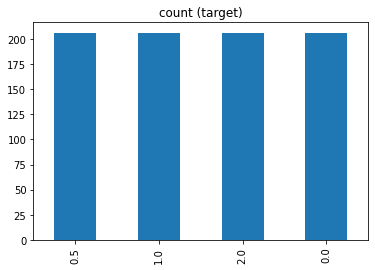

In [13]:
test_over['CDR'].value_counts().plot(kind='bar', title='count (target)')

In [14]:
test_over

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)"
343,OAS2_0175,OAS2_0175_MR1,Demented,1,0,M,R,70,16,4.0,26.0,0.5,1796,0.742,0.977,0.0,1.0,0.0,0.0,1.0
124,OAS2_0058,OAS2_0058_MR2,Demented,2,212,M,R,79,14,3.0,26.0,0.5,1308,0.706,1.341,0.0,1.0,0.0,0.0,1.0
17,OAS2_0010,OAS2_0010_MR1,Demented,1,0,F,R,66,12,3.0,30.0,0.5,1447,0.769,1.213,0.0,1.0,0.0,1.0,0.0
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046,0.0,1.0,0.0,0.0,1.0
321,OAS2_0159,OAS2_0159_MR2,Demented,2,759,F,R,76,14,3.0,28.0,0.5,1236,0.764,1.419,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,OAS2_0183,OAS2_0183_MR3,Nondemented,3,732,F,R,68,13,2.0,30.0,0.0,1506,0.740,1.165,0.0,0.0,1.0,1.0,0.0
364,OAS2_0183,OAS2_0183_MR4,Nondemented,4,2107,F,R,72,13,2.0,30.0,0.0,1510,0.723,1.162,0.0,0.0,1.0,1.0,0.0
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331,0.0,0.0,1.0,1.0,0.0
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323,0.0,0.0,1.0,1.0,0.0


In [15]:
df1=test_over.copy()

In [16]:
df1.reset_index()

,index,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)"
0,343,OAS2_0175,OAS2_0175_MR1,Demented,1,0,M,R,70,16,4.0,26.0,0.5,1796,0.742,0.977,0.0,1.0,0.0,0.0,1.0
1,124,OAS2_0058,OAS2_0058_MR2,Demented,2,212,M,R,79,14,3.0,26.0,0.5,1308,0.706,1.341,0.0,1.0,0.0,0.0,1.0
2,17,OAS2_0010,OAS2_0010_MR1,Demented,1,0,F,R,66,12,3.0,30.0,0.5,1447,0.769,1.213,0.0,1.0,0.0,1.0,0.0
3,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046,0.0,1.0,0.0,0.0,1.0
4,321,OAS2_0159,OAS2_0159_MR2,Demented,2,759,F,R,76,14,3.0,28.0,0.5,1236,0.764,1.419,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,363,OAS2_0183,OAS2_0183_MR3,Nondemented,3,732,F,R,68,13,2.0,30.0,0.0,1506,0.740,1.165,0.0,0.0,1.0,1.0,0.0
820,364,OAS2_0183,OAS2_0183_MR4,Nondemented,4,2107,F,R,72,13,2.0,30.0,0.0,1510,0.723,1.162,0.0,0.0,1.0,1.0,0.0
821,370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331,0.0,0.0,1.0,1.0,0.0
822,371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323,0.0,0.0,1.0,1.0,0.0


For __Feature Engineering__ the __Train data__ should only be taken into consideration for the statistics value and 

then these values will be then used for both train and test. This is the best and optimal way to prevent the 

overfitting later in Model Building part.

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df1.drop('CDR' , axis=1) , df1['CDR'] , test_size=0.3 , 
                                                      random_state=2)

In [18]:
X_train.shape , X_test.shape

((576, 19), (248, 19))

### 1) Missing Value Imputation
- by Median Imputation method

In [19]:
missing_variables = [feature for feature in df.columns if df[feature].isnull().sum()>0]
X_train[missing_variables].isnull().mean()

SES     0.064236
MMSE    0.013889
dtype: float64

So SES has 5% of missing values and MMSE has .05% of missign values

In [20]:
median_SES = X_train['SES'].median()
X_train['SES_imputed'] = X_train['SES'].fillna(median_SES)
X_test['SES_imputed'] = X_test['SES'].fillna(median_SES)

In [21]:
median_MMSE = df['MMSE'].median()
X_train['MMSE_imputed'] = df['MMSE'].fillna(median_MMSE)
X_test['MMSE_imputed'] = X_test['MMSE'].fillna(median_SES)

2 New variables Created for the analysis and it later will be removed

In [22]:
X_train.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,1272,0.698,1.380,0.0,0.0,1.0,1.0,0.0,2.0,30.0
321,OAS2_0159,OAS2_0159_MR2,Demented,2,759,F,R,76,14,3.0,28.0,1236,0.764,1.419,0.0,1.0,0.0,1.0,0.0,3.0,28.0
94,OAS2_0046,OAS2_0046_MR2,Demented,2,575,F,R,85,15,2.0,22.0,1483,0.748,1.183,0.0,1.0,0.0,1.0,0.0,2.0,22.0
251,OAS2_0120,OAS2_0120_MR2,Demented,2,595,F,R,78,14,3.0,15.0,1401,0.700,1.253,0.0,1.0,0.0,1.0,0.0,3.0,15.0
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1.0,21.0,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0


In [23]:
X_test.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1.0,21.0,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0
44,OAS2_0023,OAS2_0023_MR2,Demented,2,578,F,R,87,12,4.0,21.0,1250,0.652,1.405,0.0,1.0,0.0,1.0,0.0,4.0,21.0
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1.0,25.0,1710,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1.0,21.0,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1.0,25.0,1710,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0


__Cheking out the distribution after imputation__

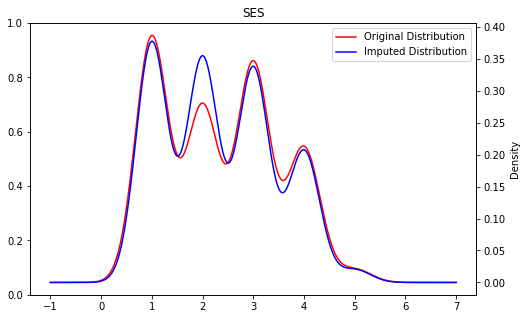

In [24]:
fig , ax = plt.subplots(figsize=(8,5))
ax2=ax.twinx()

X_train['SES'].plot.density(color='red' , label='Original Distribution')

X_train['SES_imputed'].plot.density(color='blue' , label='Imputed Distribution')

plt.legend()
plt.title('SES')
plt.show()

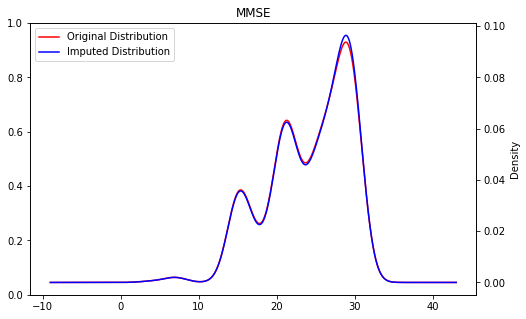

In [25]:
fig , ax = plt.subplots(figsize=(8,5))
ax2=ax.twinx()

X_train['MMSE'].plot.density(color='red' , label='Original Distribution')

X_train['MMSE_imputed'].plot.density(color='blue' , label='Imputed Distribution')

plt.legend()
plt.title('MMSE')
plt.show()

We can see the there is the distortion of the original varible distribution in Variable `SSE` as the missing data is 5%.

But not in the `MMSE` variable

__Variance__

In [26]:
X_train['SES'].var() , X_train['SES_imputed'].var()  
# so we can also see the change in the variance

(1.2971977571021591, 1.2214462560386452)

In [27]:
X_train['MMSE'].var() , X_train['MMSE_imputed'].var()  
# almost same 

(26.755418312343135, 26.71680857487925)

__Covariance__

In [28]:
X_train.cov()

,Visit,MR Delay,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed
Visit,0.575459,332.118068,0.733527,0.124444,-0.060942,-0.497575,1.912271,-0.004338,-0.001344,0.005411,-0.015266,0.009855,-0.029179,0.029179,-0.067053,-0.422995
MR Delay,332.118068,245593.138829,970.684287,117.142379,-53.707523,-69.983885,4323.258249,-2.902826,-3.479983,5.833889,-26.785700,20.951812,-0.356570,0.356570,-53.275477,-36.196310
Age,0.733527,970.684287,80.660857,3.500302,-2.938689,-3.074645,-53.767307,-0.177818,0.024853,0.062778,0.204251,-0.267029,1.299469,-1.299469,-2.714487,-3.151697
EDUC,0.124444,117.142379,3.500302,7.837669,-2.478864,1.142516,184.807886,0.006549,-0.140035,0.004469,-0.041932,0.037464,-0.318019,0.318019,-2.273919,0.931987
SES,-0.060942,-53.707523,-2.938689,-2.478864,1.297198,-0.700719,-76.023664,0.001382,0.058208,-0.037223,0.017270,0.019953,0.072991,-0.072991,1.297198,-0.700719
MMSE,-0.497575,-69.983885,-3.074645,1.142516,-0.700719,26.755418,30.699121,0.090165,-0.005128,0.231177,-1.416251,1.185073,-0.268202,0.268202,-0.697093,26.755418
eTIV,1.912271,4323.258249,-53.767307,184.807886,-76.023664,30.699121,26217.968973,0.169672,-20.351722,-2.346401,0.411981,1.934420,-43.515411,43.515411,-69.552289,7.723400
nWBV,-0.004338,-2.902826,-0.177818,0.006549,0.001382,0.090165,0.169672,0.001369,-0.000008,0.000276,-0.005517,0.005241,-0.002015,0.002015,0.001142,0.090069
ASF,-0.001344,-3.479983,0.024853,-0.140035,0.058208,-0.005128,-20.351722,-0.000008,0.016157,0.001666,-0.001035,-0.000632,0.032657,-0.032657,0.052975,0.016955
"(Converted,)",0.005411,5.833889,0.062778,0.004469,-0.037223,0.231177,-2.346401,0.000276,0.001666,0.046329,-0.035169,-0.011159,0.003961,-0.003961,-0.033708,0.224626


We can see that Variable covariance is also changed for the `SES` variable but for the `MMSE` is almost same there is no change

So after all the inferences derived after the imputation . We come to a conclusion to make the additional missing indicator for the variable `SES`

In [29]:
# 1 for missing and 0 for not missing

X_train['missing_indicator_SES'] = np.where(X_train['SES'].isnull() , 1 , 0)  
X_test['missing_indicator_SES'] = np.where(X_test['SES'].isnull() , 1 , 0)

In [30]:
X_train.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed,missing_indicator_SES
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,1272,0.698,1.380,0.0,0.0,1.0,1.0,0.0,2.0,30.0,0
321,OAS2_0159,OAS2_0159_MR2,Demented,2,759,F,R,76,14,3.0,28.0,1236,0.764,1.419,0.0,1.0,0.0,1.0,0.0,3.0,28.0,0
94,OAS2_0046,OAS2_0046_MR2,Demented,2,575,F,R,85,15,2.0,22.0,1483,0.748,1.183,0.0,1.0,0.0,1.0,0.0,2.0,22.0,0
251,OAS2_0120,OAS2_0120_MR2,Demented,2,595,F,R,78,14,3.0,15.0,1401,0.700,1.253,0.0,1.0,0.0,1.0,0.0,3.0,15.0,0
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1.0,21.0,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0,0


In [31]:
X_test.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed,missing_indicator_SES
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1.0,21.0,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0,0
44,OAS2_0023,OAS2_0023_MR2,Demented,2,578,F,R,87,12,4.0,21.0,1250,0.652,1.405,0.0,1.0,0.0,1.0,0.0,4.0,21.0,0
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1.0,25.0,1710,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0,0
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1.0,21.0,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0,0
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1.0,25.0,1710,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0,0


In [32]:
X_train.drop(['SES' , 'MMSE'] , axis=1 , inplace=True)
X_test.drop(['SES' , 'MMSE'] , axis=1 , inplace=True)

In [33]:
X_train.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed,missing_indicator_SES
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,1272,0.698,1.380,0.0,0.0,1.0,1.0,0.0,2.0,30.0,0
321,OAS2_0159,OAS2_0159_MR2,Demented,2,759,F,R,76,14,1236,0.764,1.419,0.0,1.0,0.0,1.0,0.0,3.0,28.0,0
94,OAS2_0046,OAS2_0046_MR2,Demented,2,575,F,R,85,15,1483,0.748,1.183,0.0,1.0,0.0,1.0,0.0,2.0,22.0,0
251,OAS2_0120,OAS2_0120_MR2,Demented,2,595,F,R,78,14,1401,0.700,1.253,0.0,1.0,0.0,1.0,0.0,3.0,15.0,0
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0,0


In [34]:
X_test.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed,missing_indicator_SES
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0,0
44,OAS2_0023,OAS2_0023_MR2,Demented,2,578,F,R,87,12,1250,0.652,1.405,0.0,1.0,0.0,1.0,0.0,4.0,21.0,0
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1710,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0,0
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0,0
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1710,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0,0


In [35]:
X_train.isnull().sum()

Subject ID               0
MRI ID                   0
Group                    0
Visit                    0
MR Delay                 0
M/F                      0
Hand                     0
Age                      0
EDUC                     0
eTIV                     0
nWBV                     0
ASF                      0
(Converted,)             0
(Demented,)              0
(Nondemented,)           0
(F,)                     0
(M,)                     0
SES_imputed              0
MMSE_imputed             0
missing_indicator_SES    0
dtype: int64

In [36]:
X_test.isnull().sum()

Subject ID               0
MRI ID                   0
Group                    0
Visit                    0
MR Delay                 0
M/F                      0
Hand                     0
Age                      0
EDUC                     0
eTIV                     0
nWBV                     0
ASF                      0
(Converted,)             0
(Demented,)              0
(Nondemented,)           0
(F,)                     0
(M,)                     0
SES_imputed              0
MMSE_imputed             0
missing_indicator_SES    0
dtype: int64

__So there are now no missing data in the dataset__

In [37]:
y_test

184    2.0
44     0.5
330    2.0
184    2.0
330    2.0
      ... 
37     0.5
245    0.0
257    0.5
345    0.5
155    1.0
Name: CDR, Length: 248, dtype: float64

In [38]:
X_test.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed,missing_indicator_SES
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0,0
44,OAS2_0023,OAS2_0023_MR2,Demented,2,578,F,R,87,12,1250,0.652,1.405,0.0,1.0,0.0,1.0,0.0,4.0,21.0,0
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1710,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0,0
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0,0
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1710,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0,0


In [39]:
# We changed the 4 class to 0,1,2,an 3 so that the model don't see it as a continous value

y_testt=y_test.replace({0.0:0, 0.5:1, 1.0:1, 2.0:1}).astype('int')
y_trainn=y_train.replace({0.0:0, 0.5:1, 1.0:1, 2.0:1}).astype('int')

y_test=y_test.replace({0.0:0, 0.5:1, 1.0:2, 2.0:3}).astype('int')
y_train=y_train.replace({0.0:0, 0.5:1, 1.0:2, 2.0:3}).astype('int')

In [40]:
# We drop the columns that are not useful to the model
X_train.drop(['Subject ID', 'MRI ID', 'Hand'], axis=1, inplace=True)
X_test.drop(['Subject ID', 'MRI ID', 'Hand'], axis=1, inplace=True)

In [41]:
X_train.drop(['Group'], axis=1, inplace=True)
X_test.drop(['Group'], axis=1, inplace=True)

In [42]:
X_train.drop(['M/F'], axis=1, inplace=True)
X_test.drop(['M/F'], axis=1, inplace=True)

In [43]:
# We can use this binary classification to predict the probability of 
# a patient have dementia

# def proba(n):
#     if n == 0:
#         return 0
#     else:
#         return 1


# df['yy'] = df['CDR'].apply(lambda x: proba(x))

## Modeling

In [44]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
base_model = LogisticRegression(solver="liblinear")
base_model.fit(X_train,y_train)

print(f1_score(y_test,base_model.predict(X_test), average='weighted'))

0.8261716144004262


In [46]:
print(confusion_matrix(y_test, base_model.predict(X_test)))
print('*'*50)
print(classification_report(y_test, base_model.predict(X_test)))


[[60  0  0  0]
 [10 39  9  5]
 [ 0 13 39  4]
 [ 0  0  0 69]]
**************************************************
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        60
           1       0.75      0.62      0.68        63
           2       0.81      0.70      0.75        56
           3       0.88      1.00      0.94        69

    accuracy                           0.83       248
   macro avg       0.83      0.83      0.82       248
weighted avg       0.83      0.83      0.83       248



In [47]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.5,
                           max_depth=4,random_state = 7)
gbt.fit(X_train,y_train)

print(f1_score(y_test,gbt.predict(X_test), average='weighted'))

0.9756785989638876


In [48]:
print(confusion_matrix(y_test, gbt.predict(X_test)))
print('*'*50)
print(classification_report(y_test, gbt.predict(X_test)))


[[59  1  0  0]
 [ 2 59  2  0]
 [ 0  0 55  1]
 [ 0  0  0 69]]
**************************************************
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        60
           1       0.98      0.94      0.96        63
           2       0.96      0.98      0.97        56
           3       0.99      1.00      0.99        69

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248



In [49]:
rfc = RandomForestClassifier(n_estimators=100,
                           max_depth=7,random_state = 7)
rfc.fit(X_train,y_train)

print(f1_score(y_test,rfc.predict(X_test), average='weighted'))

0.9878726805595204


In [50]:
print(confusion_matrix(y_test, rfc.predict(X_test)))
print('*'*50)
print(classification_report(y_test, rfc.predict(X_test)))


[[59  1  0  0]
 [ 1 61  1  0]
 [ 0  0 56  0]
 [ 0  0  0 69]]
**************************************************
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.98      0.97      0.98        63
           2       0.98      1.00      0.99        56
           3       1.00      1.00      1.00        69

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248



In [51]:
dtc = DecisionTreeClassifier(max_depth=3,random_state = 7)

dtc.fit(X_train,y_train)

print(f1_score(y_test,dtc.predict(X_test), average='weighted'))

0.7986710641762376


In [52]:
print(confusion_matrix(y_test, dtc.predict(X_test)))
print('*'*50)
print(classification_report(y_test, dtc.predict(X_test)))


[[60  0  0  0]
 [ 6 34 12 11]
 [ 0 13 38  5]
 [ 0  0  0 69]]
**************************************************
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        60
           1       0.72      0.54      0.62        63
           2       0.76      0.68      0.72        56
           3       0.81      1.00      0.90        69

    accuracy                           0.81       248
   macro avg       0.80      0.80      0.80       248
weighted avg       0.80      0.81      0.80       248



In [53]:
#Function for creating a dataframe based on order of importance of features
def feat_imp_sorter(model, x):
    warnings.simplefilter(action='ignore', category=FutureWarning)
    feature_imp = pd.DataFrame(zip(model.feature_importances_,x.columns), columns=['Value','Features'])
    feature_imp.sort_values(by='Value',ignore_index=True, ascending=False, inplace = True)
    return feature_imp
    
#fUnction for ploting barplot for the feature importance of any model    
def feat_imp_ploter(model,x):
    sorted_feat = feat_imp_sorter(model,x)
#     print(sorted_feat.shape)
    
    plt.figure(figsize=(5, 5))
    sns.barplot(x="Value", y="Features", data=sorted_feat)
    plt.title(str(model) +'Features_important')
    plt.tight_layout()

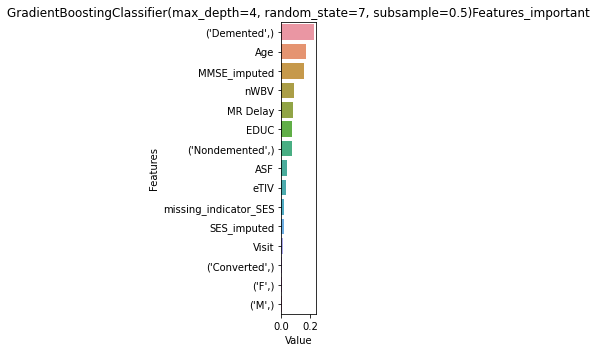

In [54]:
import warnings
feat_imp_ploter(gbt, X_train)

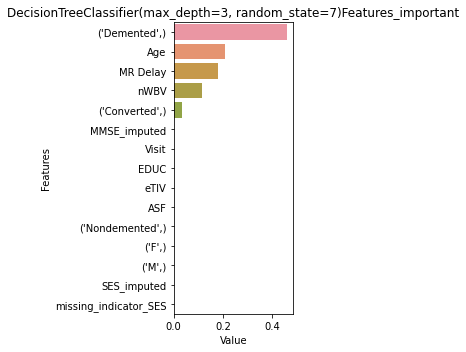

In [55]:
feat_imp_ploter(dtc, X_train)

In [56]:
corr= df1.corr()
corr

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)"
Visit,1.000000,0.879371,0.093545,0.033575,-0.060871,-0.137880,0.078749,0.028925,-0.138114,-0.029655,0.024055,-0.050169,0.040863,-0.117135,0.117135
MR Delay,0.879371,1.000000,0.212602,0.053297,-0.070350,-0.033037,0.035717,0.046286,-0.141805,-0.051488,0.068178,-0.136358,0.109575,-0.018246,0.018246
Age,0.093545,0.212602,1.000000,0.127231,-0.276951,-0.095309,0.345640,-0.029775,-0.549837,0.007582,0.012306,0.080005,-0.092160,0.296242,-0.296242
EDUC,0.033575,0.053297,0.127231,1.000000,-0.777666,0.086164,0.249847,0.388758,0.082300,-0.375394,0.034562,-0.049654,0.034714,-0.198059,0.198059
SES,-0.060871,-0.070350,-0.276951,-0.777666,1.000000,-0.108985,-0.233806,-0.392613,0.030295,0.389286,-0.159483,0.047268,0.035279,0.092157,-0.092157
MMSE,-0.137880,-0.033037,-0.095309,0.086164,-0.108985,1.000000,-0.674249,0.021423,0.488524,0.009940,0.199430,-0.601399,0.536735,-0.104381,0.104381
CDR,0.078749,0.035717,0.345640,0.249847,-0.233806,-0.674249,1.000000,0.103757,-0.382511,-0.131618,-0.186133,0.694675,-0.644115,0.076987,-0.076987
eTIV,0.028925,0.046286,-0.029775,0.388758,-0.392613,0.021423,0.103757,1.000000,0.016700,-0.989643,-0.097218,0.029405,0.020334,-0.550248,0.550248
nWBV,-0.138114,-0.141805,-0.549837,0.082300,0.030295,0.488524,-0.382511,0.016700,1.000000,0.013022,0.049198,-0.353600,0.352131,-0.120460,0.120460
ASF,-0.029655,-0.051488,0.007582,-0.375394,0.389286,0.009940,-0.131618,-0.989643,0.013022,1.000000,0.095638,-0.044102,-0.003767,0.529271,-0.529271


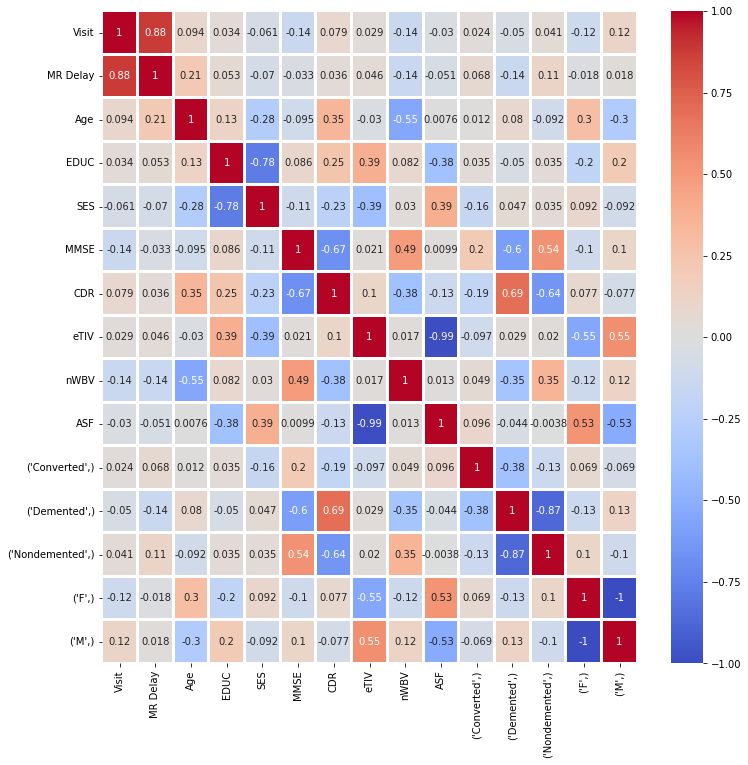

In [57]:

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr,cmap='coolwarm',linewidths=2.0, annot=True)

In [58]:
#From the correlation chart, dropping features with absolute values less than 1 as compared with the target column (CDR).
abs(corr['CDR'])>0.1

Visit             False
MR Delay          False
Age                True
EDUC               True
SES                True
MMSE               True
CDR                True
eTIV               True
nWBV               True
ASF                True
(Converted,)       True
(Demented,)        True
(Nondemented,)     True
(F,)              False
(M,)              False
Name: CDR, dtype: bool

In [59]:
#To remove Visit, MR Delay, (F,), (M,)
idx_to_delete = [0,1,10, 11]
indices = [i for i in range(X_train.shape[-1]) if i not in idx_to_delete]

In [60]:
X_train2= X_train.iloc[:, indices]
X_test2= X_test.iloc[:, indices]

In [61]:
X_train2

,Age,EDUC,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)",SES_imputed,MMSE_imputed,missing_indicator_SES
13,93,14,1272,0.698,1.380,0.0,0.0,1.0,2.0,30.0,0
321,76,14,1236,0.764,1.419,0.0,1.0,0.0,3.0,28.0,0
94,85,15,1483,0.748,1.183,0.0,1.0,0.0,2.0,22.0,0
251,78,14,1401,0.700,1.253,0.0,1.0,0.0,3.0,15.0,0
184,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...
251,78,14,1401,0.700,1.253,0.0,1.0,0.0,3.0,15.0,0
251,78,14,1401,0.700,1.253,0.0,1.0,0.0,3.0,15.0,0
184,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,21.0,0
251,78,14,1401,0.700,1.253,0.0,1.0,0.0,3.0,15.0,0


In [62]:
X_test2

,Age,EDUC,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)",SES_imputed,MMSE_imputed,missing_indicator_SES
184,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,21.0,0
44,87,12,1250,0.652,1.405,0.0,1.0,0.0,4.0,21.0,0
330,79,20,1710,0.760,1.026,0.0,1.0,0.0,1.0,25.0,0
184,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,21.0,0
330,79,20,1710,0.760,1.026,0.0,1.0,0.0,1.0,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...
37,82,20,1606,0.677,1.093,1.0,0.0,0.0,1.0,28.0,0
245,67,14,1508,0.794,1.164,1.0,0.0,0.0,4.0,30.0,0
257,71,16,1479,0.750,1.187,0.0,1.0,0.0,3.0,27.0,0
345,73,16,1803,0.731,0.973,0.0,1.0,0.0,4.0,28.0,0


In [63]:
y_train2 = y_train.copy()
y_test2 = y_test.copy()

In [64]:
base_model = LogisticRegression()
base_model.fit(X_train2,y_train2)

print(f1_score(y_test2,base_model.predict(X_test2), average='weighted'))

0.6448980843395027


In [67]:
print(confusion_matrix(y_test2, base_model.predict(X_test2)))
print('*'*50)
print(classification_report(y_test2, base_model.predict(X_test2)))


[[50  7  1  2]
 [19 25 13  6]
 [12 13 22  9]
 [ 0  0  0 69]]
**************************************************
              precision    recall  f1-score   support

           0       0.62      0.83      0.71        60
           1       0.56      0.40      0.46        63
           2       0.61      0.39      0.48        56
           3       0.80      1.00      0.89        69

    accuracy                           0.67       248
   macro avg       0.65      0.66      0.64       248
weighted avg       0.65      0.67      0.64       248



In [68]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.5,
                           max_depth=4,random_state = 7)
gbt.fit(X_train2,y_train2)

print(f1_score(y_test2,gbt.predict(X_test2), average='weighted'))

0.9757430097442279


In [69]:
#To remove  (F,), (M,)
idx_to_delete = [10, 11]
indices = [i for i in range(X_train.shape[-1]) if i not in idx_to_delete]

In [70]:
X_train3= X_train.iloc[:, indices]
X_test3= X_test.iloc[:, indices]

In [71]:
y_train3 = y_train.copy()
y_test3 = y_test.copy()

In [72]:
base_model = LogisticRegression()
base_model.fit(X_train3,y_train3)

print(f1_score(y_test3,base_model.predict(X_test3), average='weighted'))

0.6651090590328975


In [73]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.5,
                           max_depth=4,random_state = 7)
gbt.fit(X_train3,y_train3)

print(f1_score(y_test3,gbt.predict(X_test3), average='weighted'))

0.9756785989638876


In [74]:
rfc = RandomForestClassifier(n_estimators=100,
                           max_depth=7,random_state = 7)
rfc.fit(X_train3,y_train3)

print(f1_score(y_test3,rfc.predict(X_test3), average='weighted'))

0.9797506242944617


In [75]:
#To remove  (M,)
idx_to_delete = [ 11]
indices2 = [i for i in range(X_train.shape[-1]) if i not in idx_to_delete]

In [76]:
X_train4= X_train.iloc[:, indices2]
X_test4= X_test.iloc[:, indices2]

In [77]:
y_train4 = y_train.copy()
y_test4 = y_test.copy()

In [78]:
base_model = LogisticRegression()
base_model.fit(X_train4,y_train4)

print(f1_score(y_test4,base_model.predict(X_test4), average='weighted'))

0.5762298903587629


In [79]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.5,
                           max_depth=4,random_state = 7)
gbt.fit(X_train4,y_train4)

print(f1_score(y_test4,gbt.predict(X_test4), average='weighted'))

0.9756785989638876


In [80]:
rfc = RandomForestClassifier(n_estimators=100,
                           max_depth=10,random_state = 3)
rfc.fit(X_train4,y_train4)

print(f1_score(y_test4,rfc.predict(X_test4), average='weighted'))

0.9878726805595204


# This gave better F1_score

## Predicting Probability of being dementia
we will be using binary classification predict_proba and we will go with the model with the best performance (gb)



In [86]:
gbt.fit(X_train, y_trainn) # this  y_train2 is the second target variable for the binary classification
gbt.predict_proba(X_test)

array([[2.88901868e-05, 9.99971110e-01],
       [2.94998268e-05, 9.99970500e-01],
       [2.63328526e-05, 9.99973667e-01],
       [2.88901868e-05, 9.99971110e-01],
       [2.63328526e-05, 9.99973667e-01],
       [2.88901868e-05, 9.99971110e-01],
       [9.99914380e-01, 8.56202258e-05],
       [1.37666413e-03, 9.98623336e-01],
       [2.88901868e-05, 9.99971110e-01],
       [2.54827981e-05, 9.99974517e-01],
       [3.06149206e-05, 9.99969385e-01],
       [3.05676597e-05, 9.99969432e-01],
       [2.54805155e-05, 9.99974519e-01],
       [2.54827981e-05, 9.99974517e-01],
       [2.54827981e-05, 9.99974517e-01],
       [1.70572740e-05, 9.99982943e-01],
       [2.54827981e-05, 9.99974517e-01],
       [2.88901868e-05, 9.99971110e-01],
       [2.88901868e-05, 9.99971110e-01],
       [2.54828274e-05, 9.99974517e-01],
       [9.99947854e-01, 5.21461559e-05],
       [1.37666413e-03, 9.98623336e-01],
       [2.67627112e-05, 9.99973237e-01],
       [2.52535589e-05, 9.99974746e-01],
       [1.704284

Since our target is (0,1), then the classifier output a probability matrix of dimension (N,2). The first index refers to the probability that the data belong to class 0 (Normal), and the second refers to the probability that the data belong to class 1 (Dementia).

These two would sum to 1.

We can then output the result by

In [87]:
gbt.predict_proba(X_test)[:,1] # probability that each of the pateint has dementia(1)

array([9.99971110e-01, 9.99970500e-01, 9.99973667e-01, 9.99971110e-01,
       9.99973667e-01, 9.99971110e-01, 8.56202258e-05, 9.98623336e-01,
       9.99971110e-01, 9.99974517e-01, 9.99969385e-01, 9.99969432e-01,
       9.99974519e-01, 9.99974517e-01, 9.99974517e-01, 9.99982943e-01,
       9.99974517e-01, 9.99971110e-01, 9.99971110e-01, 9.99974517e-01,
       5.21461559e-05, 9.98623336e-01, 9.99973237e-01, 9.99974746e-01,
       9.99982957e-01, 9.99971110e-01, 9.99971110e-01, 5.20820145e-05,
       9.99971110e-01, 9.99725227e-01, 9.99973667e-01, 9.99970179e-01,
       9.99973667e-01, 9.99973280e-01, 9.99973237e-01, 9.99971110e-01,
       9.99974517e-01, 9.99974746e-01, 9.99974746e-01, 8.54469421e-05,
       9.99974517e-01, 9.99973667e-01, 9.99974517e-01, 9.32185534e-05,
       9.99974477e-01, 9.99974517e-01, 9.99973280e-01, 1.00280113e-04,
       9.99973280e-01, 9.51145820e-05, 9.99974517e-01, 9.99983867e-01,
       9.99969751e-01, 9.99974517e-01, 9.84858591e-01, 9.99959671e-01,
      